## Import necessary libraries


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Extract csv file

In [2]:
data = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


## Check Data Types

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                369651 non-null  object 
 1   town                 369651 non-null  object 
 2   flat_type            369651 non-null  object 
 3   block                369651 non-null  object 
 4   street_name          369651 non-null  object 
 5   storey_range         369651 non-null  object 
 6   floor_area_sqm       369651 non-null  float64
 7   flat_model           369651 non-null  object 
 8   lease_commence_date  369651 non-null  int64  
 9   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.2+ MB


# Numerical
**1) lease_commence_date** <br>
**2) floor_area_sqm**

# Categorical
**1) month** <br>
**2) town** <br>
**3) flat_type** <br>
**4) block --> does not show anything** <br>
**5) street_name** <br>
**6) storey_range** <br>
**7) flat_model**


### Will explore the other 6 categorical data on resale_price apart from block

# Extract Numerical Data Type

In [4]:
NumData = pd.DataFrame(data[['floor_area_sqm', 'lease_commence_date']])
NumData.head()

,floor_area_sqm,lease_commence_date
0,69.0,1986
1,61.0,1986
2,73.0,1976
3,73.0,1976
4,67.0,1976


In [5]:
NumData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   floor_area_sqm       369651 non-null  float64
 1   lease_commence_date  369651 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 5.6 MB


# Extract Categorical Data Type

In [16]:
CatData = pd.DataFrame(data[['month', 'town', 'flat_type', 'street_name', 'storey_range', 'flat_model']])
CatData.head()

,month,town,flat_type,street_name,storey_range,flat_model
0,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,07 TO 09,Improved
1,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,04 TO 06,Improved
2,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,07 TO 09,New Generation
3,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,07 TO 09,New Generation
4,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,07 TO 09,New Generation


In [17]:
CatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   month         369651 non-null  object
 1   town          369651 non-null  object
 2   flat_type     369651 non-null  object
 3   street_name   369651 non-null  object
 4   storey_range  369651 non-null  object
 5   flat_model    369651 non-null  object
dtypes: object(6)
memory usage: 16.9+ MB


In [18]:
CatData = CatData.astype('category')

In [19]:
CatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   month         369651 non-null  category
 1   town          369651 non-null  category
 2   flat_type     369651 non-null  category
 3   street_name   369651 non-null  category
 4   storey_range  369651 non-null  category
 5   flat_model    369651 non-null  category
dtypes: category(6)
memory usage: 2.8 MB


In [20]:
CatData = pd.concat([CatData, data["resale_price"]], axis = 1).reindex(CatData.index)
CatData.head()

,month,town,flat_type,street_name,storey_range,flat_model,resale_price
0,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,07 TO 09,Improved,147000.0
1,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,04 TO 06,Improved,144000.0
2,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,07 TO 09,New Generation,159000.0
3,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,07 TO 09,New Generation,167000.0
4,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,07 TO 09,New Generation,163000.0


# Check the effect of the Categorical Variables on SalePrice


## Town

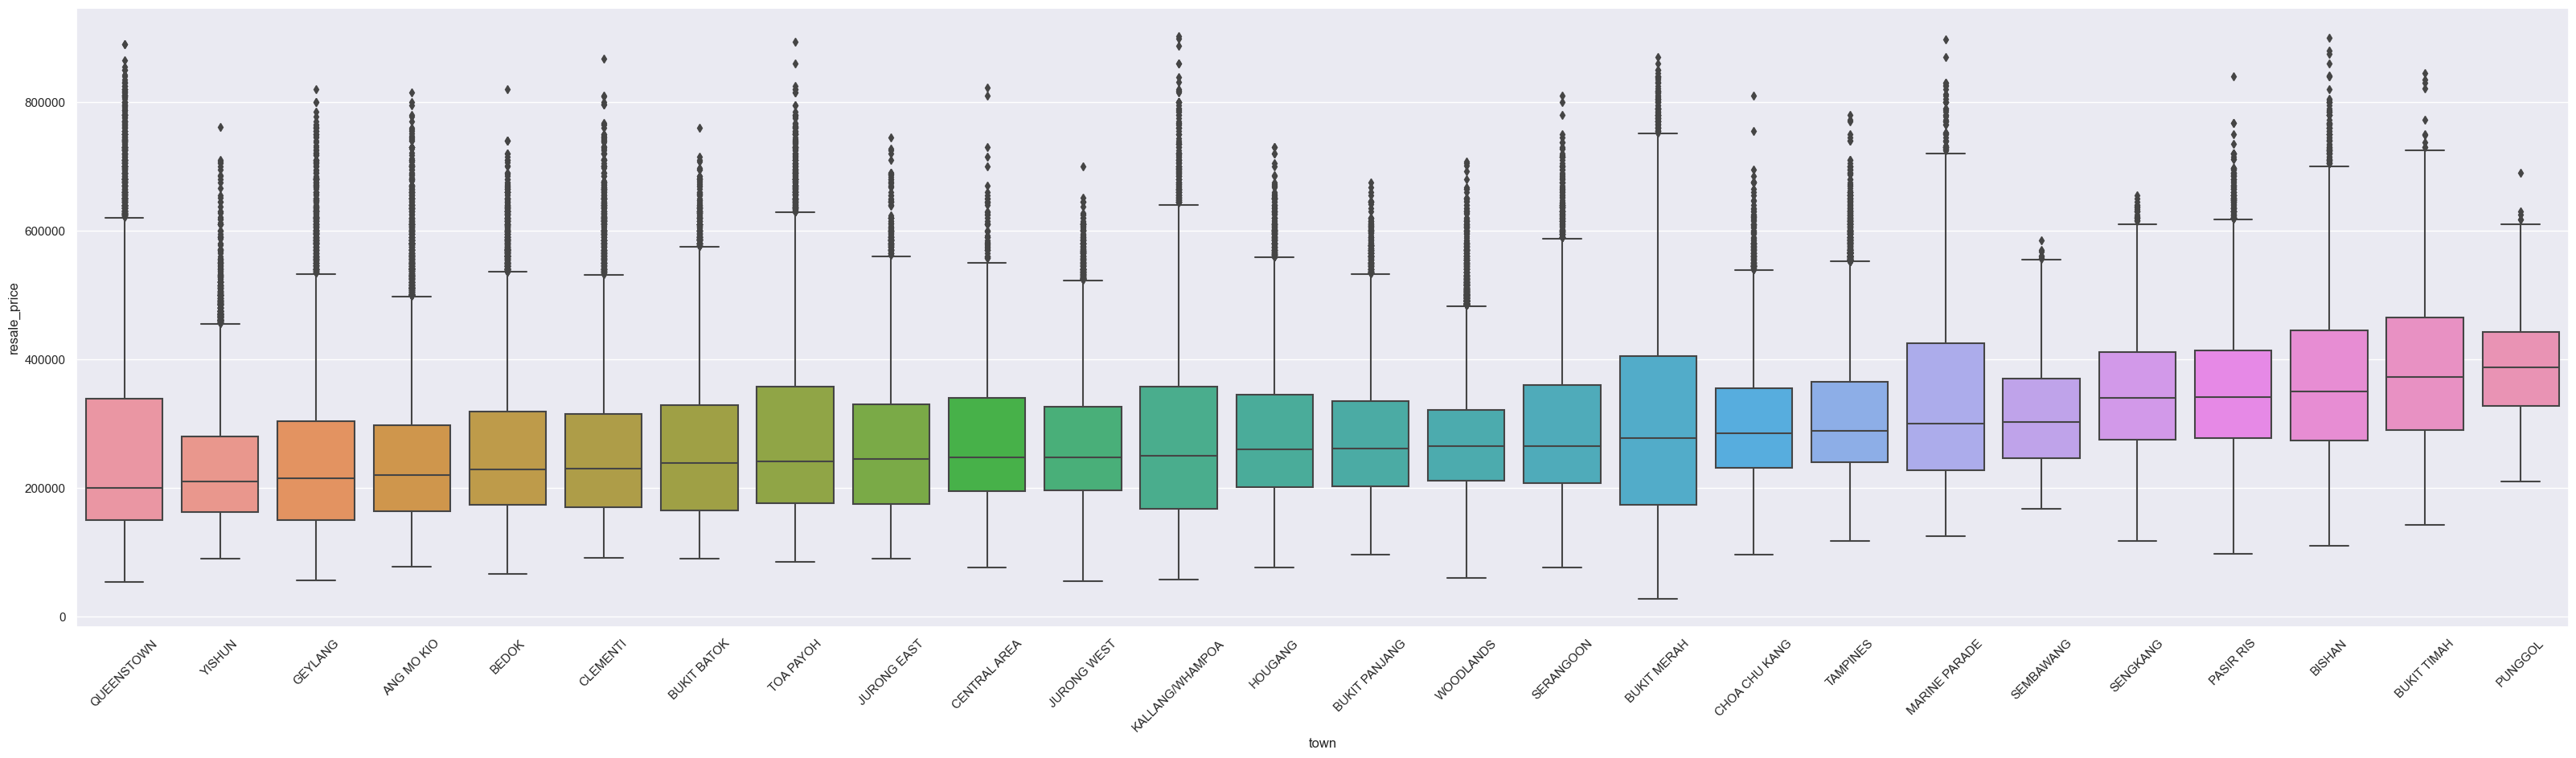

In [21]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(40, 10))
sb.boxplot(x = 'town', y = 'resale_price', data = CatData,
           order = CatData.groupby('town')['resale_price'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

## Month

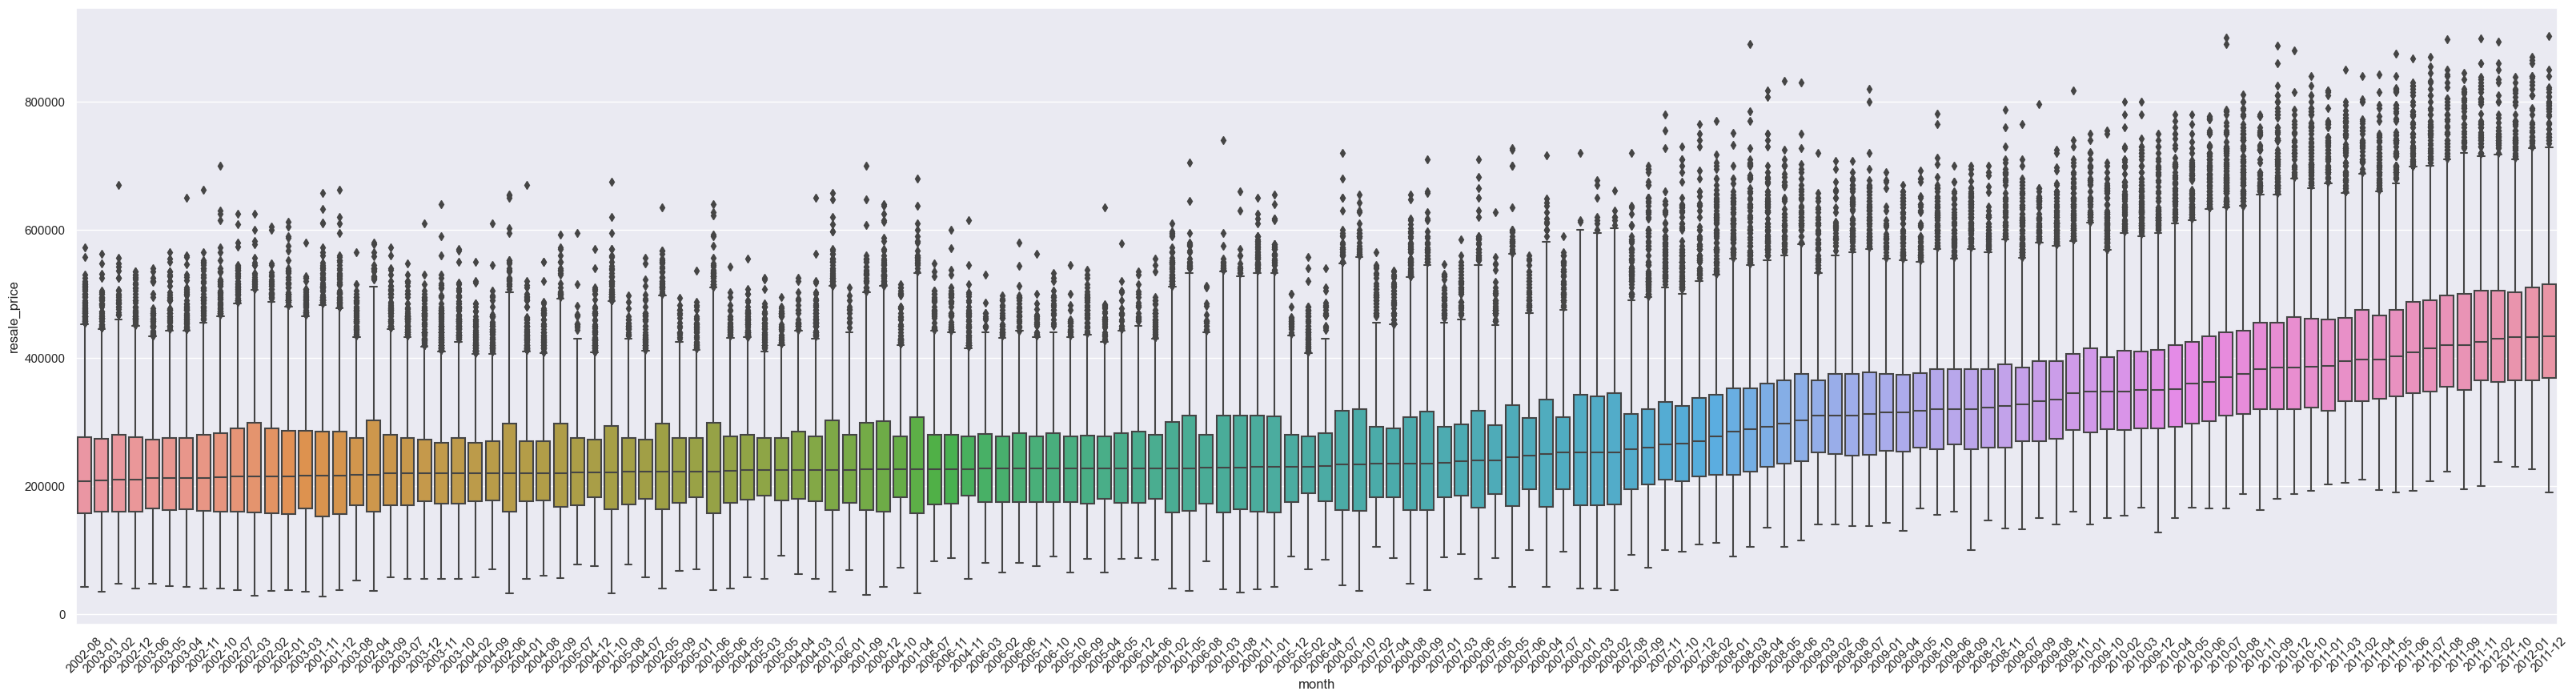

In [22]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(40, 10))
sb.boxplot(x = 'month', y = 'resale_price', data = CatData,
           order = CatData.groupby('month')['resale_price'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

## street_name

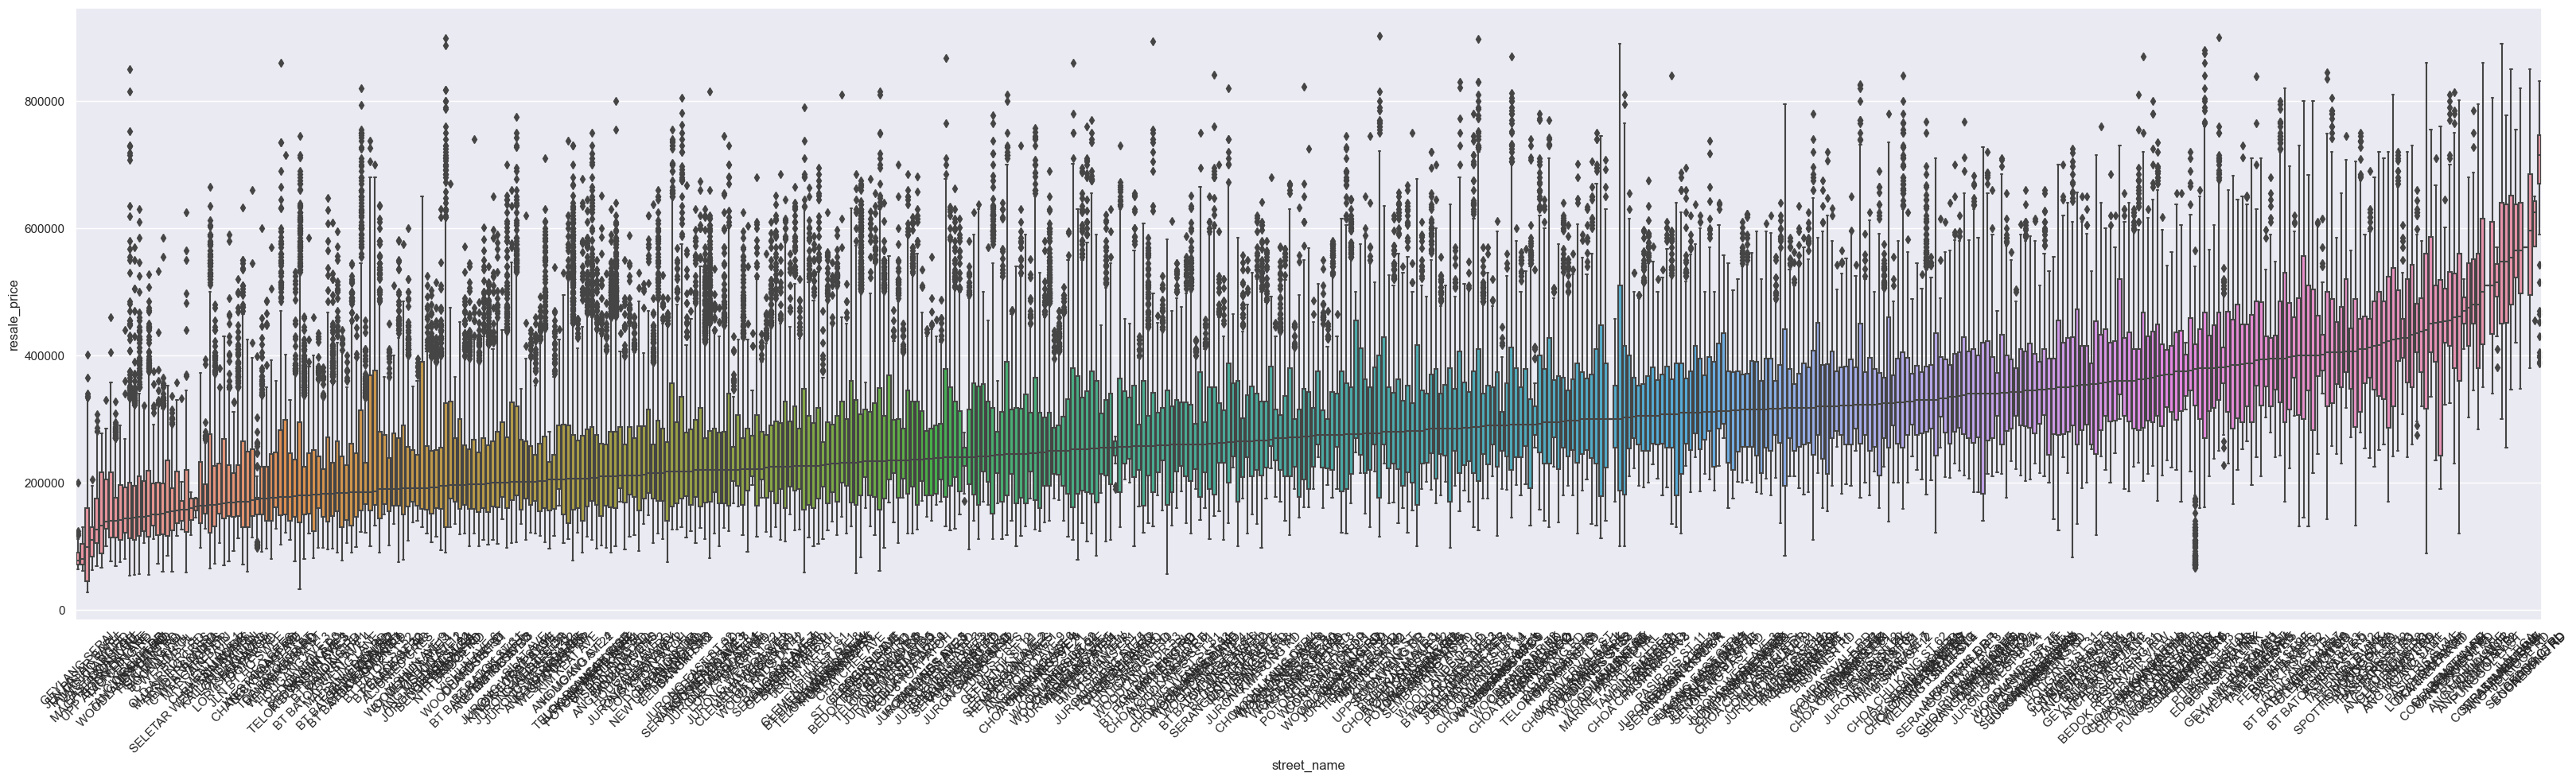

In [23]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(40, 10))
sb.boxplot(x = 'street_name', y = 'resale_price', data = CatData,
           order = CatData.groupby('street_name')['resale_price'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

## flat_type

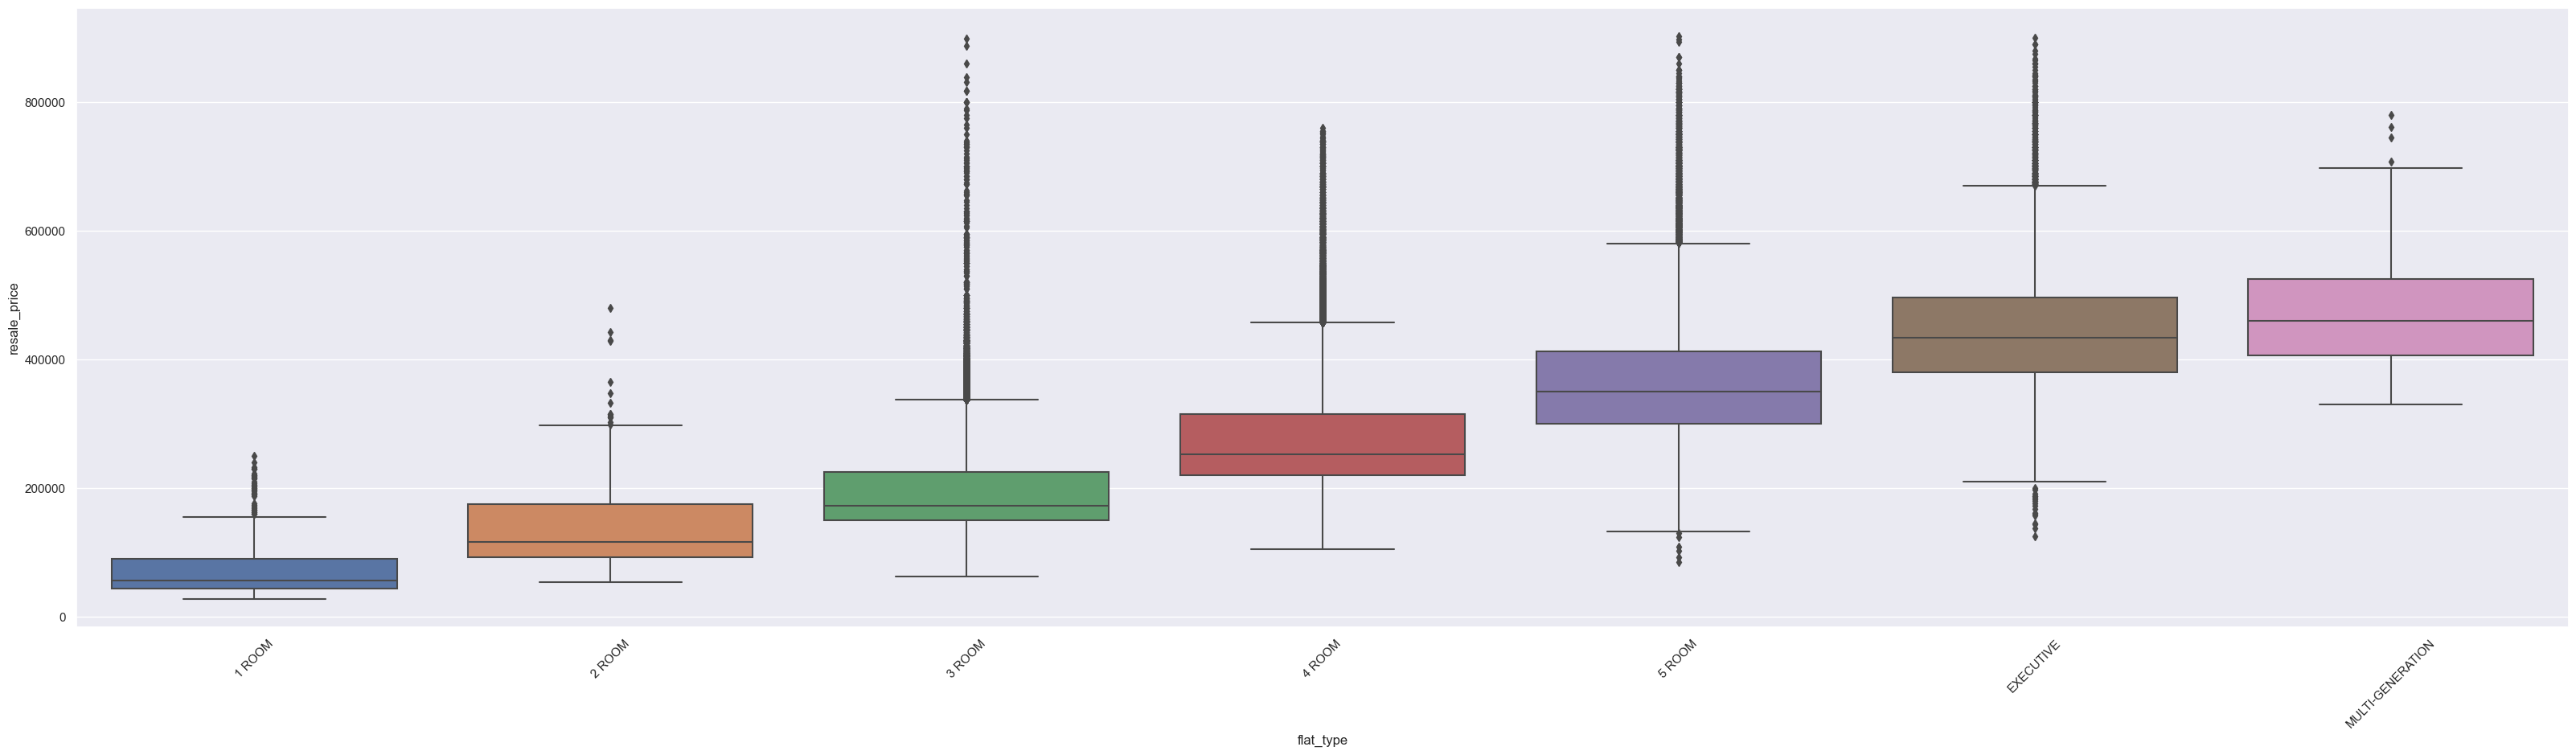

In [24]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(40, 10))
sb.boxplot(x = 'flat_type', y = 'resale_price', data = CatData,
           order = CatData.groupby('flat_type')['resale_price'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

## flat_model

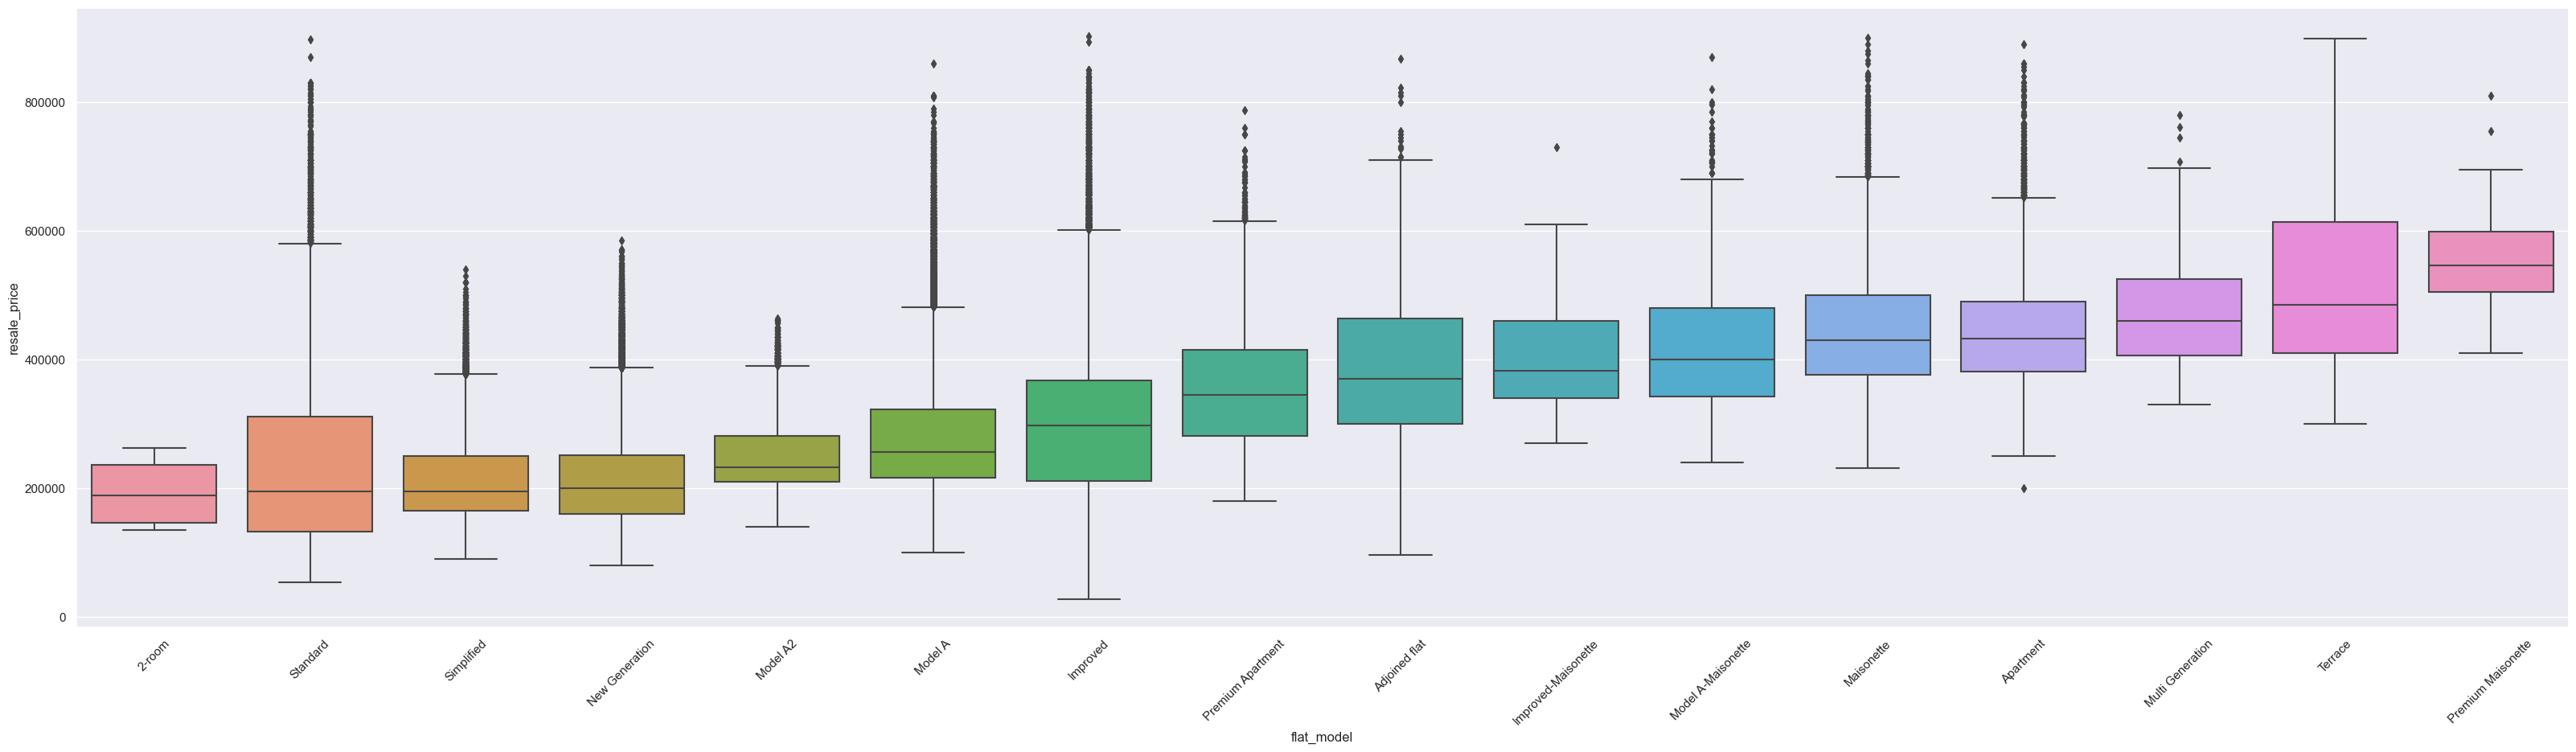

In [25]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(40, 10))
sb.boxplot(x = 'flat_model', y = 'resale_price', data = CatData,
           order = CatData.groupby('flat_model')['resale_price'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

## storey_range

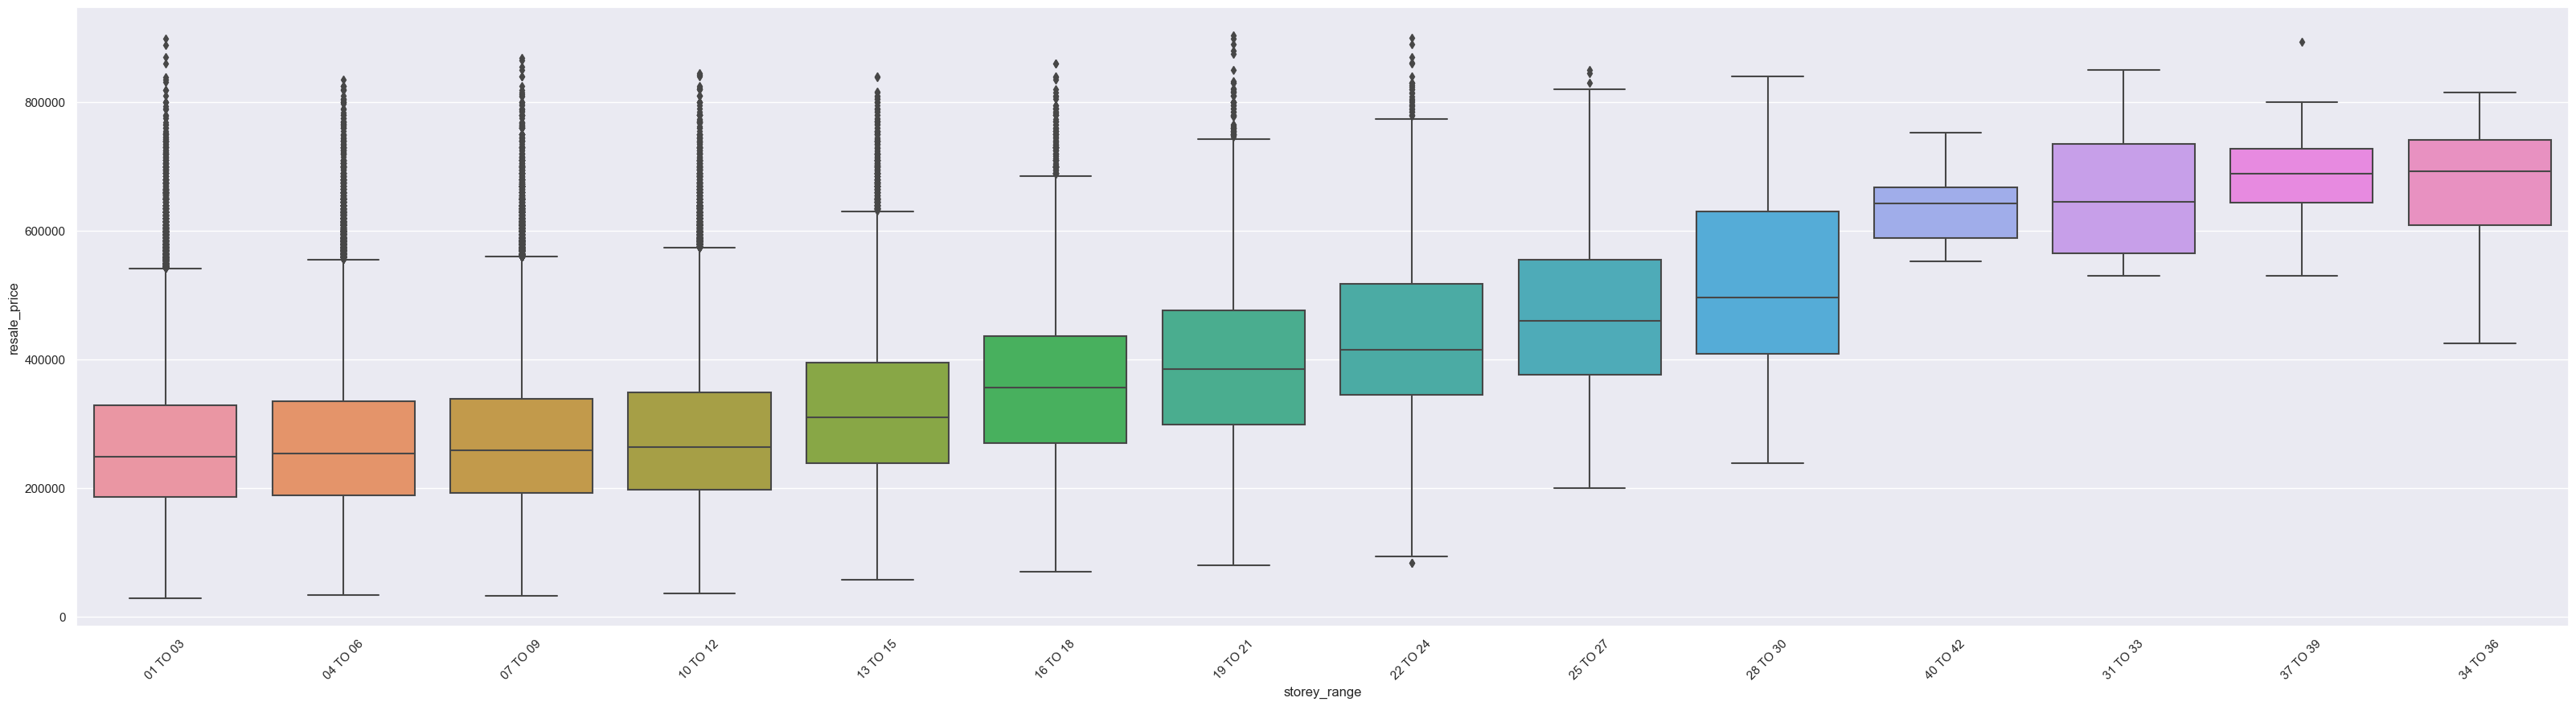

In [26]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(40, 10))
sb.boxplot(x = 'storey_range', y = 'resale_price', data = CatData,
           order = CatData.groupby('storey_range')['resale_price'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

## Analysis of Categorical Variales 

> `flat_type`  and `storey_range` and `flat_model` : Seems to be important variables : Significant variation in `resale_price` boxplots across levels   
> `town` : Not clear if important as a variable at all : Not much variation in `resale_price` boxplots across the categorical levels   
> `month` and `street_name` : Not feasible as there are too many levels in the variable to predict `resale_price`

From the above information, `flat_type` and `storey_range` and `flat_model` as the more important predictors, while filtering out `town` , `month` and `street_name` in our analysis


# Perform Mapping Of the 3 categorical predictors

In [35]:
flat_type = pd.DataFrame(data[['flat_type']])
mapping = {'1 ROOM': 1, '2 ROOM': 2, '3 ROOM': 3, '4 ROOM': 4, '5 ROOM': 5, 'EXECUTIVE': 6, 'MULTI-GENERATION': 7}
data['flat_type_num'] = flat_type['flat_type'].map(mapping)

storey_range = pd.DataFrame(data[['storey_range']])
mapping = {'01 TO 03': 2, '04 TO 06': 5, '07 TO 09': 8, '10 TO 12': 11, '13 TO 15': 14, '16 TO 18': 17, '19 TO 21': 20, '22 TO 24': 23, '25 TO 27': 26, '28 TO 30': 29, '31 TO 33': 32, '34 TO 36': 35, '37 TO 39': 38, '40 TO 42': 41}
data['Story_range_num'] = storey_range["storey_range"].map(mapping)

flat_model = pd.DataFrame(data[['flat_model']])
mapping = {'2-room': 1, 'Adjoined flat': 2, 'Apartment': 3, 'Improved': 4, 'Improved-Maisonette': 5, 'Maisonette': 6, 'Model A': 7, 'Model A-Maisonette': 8, 'Model A2': 9, 'Multi Generation': 10, 'New Generation': 11, 'Premium Apartment': 12, 'Premium Maisonette': 13, 'Simplified': 14, 'Standard': 15, 'Terrace': 16}
data['flat_model_num'] = flat_model['flat_model'].map(mapping)

## Extract the 3 categorical data after encoding it to levels

In [36]:
newCatData = pd.DataFrame(data[['flat_type_num', 'Story_range_num','flat_model_num']])
newCatData.head()

,flat_type_num,Story_range_num,flat_model_num
0,3,8,4
1,3,5,4
2,3,8,11
3,3,8,11
4,3,8,11


# Final Data Prep
***Numerical in `NumData`*** <br>
***Categorical in `newCatData`***

We will perform **Data Visualisation** on these two dataframe in the next notebook

In [37]:
NumData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   floor_area_sqm       369651 non-null  float64
 1   lease_commence_date  369651 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 5.6 MB


In [38]:
newCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   flat_type_num    369651 non-null  int64
 1   Story_range_num  369651 non-null  int64
 2   flat_model_num   369651 non-null  int64
dtypes: int64(3)
memory usage: 8.5 MB
